In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Function to get the euclidean distance for any n dimensional vectors of the same length
def euclid_nd(a,b):
    
    # Get the sum of squares for all n dimensions of a and b, where a is an object of x
    # and b is a centroid
    sum_of_squares = 0
    for n in range(len(a)):
        sum_of_squares += (b[n] - a[n])**2
    
    # return square root of the sum of squares
    return math.sqrt(sum_of_squares)


# Function for determining the closest of centroids for each object in x based on euclidean distance
'''
Note that no code change is needed from the example "kmeans.py"
Assignments for objects in x are returned in vectors regardless of the feature dimensions of x

'''

def closest_nd(x, centroids):
    
    # List for holding cluster assignments for every object in x
    assignments = []
    
    # Iterate over every object in x
    for i in x:
        
        # distance between one data point and centroids
        distance=[]
        
        # Iterate over every centroid
        for j in centroids:
            
            distance.append(euclid_nd(i, j))
            
        # assign each data point to the cluster with closest centroid   
        assignments.append(np.argmin(distance))

    return np.array(assignments)


# Updates the centroids based on assigned clusters from function closest_nd
def update_nd(x, clusters, K):
    
    # Build np array of centroids for number of axes * clusters
    new_centroids = np.zeros(shape=(K,x.shape[1]))

    # Get cluster mean(s) for each cluster K
    for c in range(K):

        # For each feature dimension (axis) of x
        for n in range(x.shape[1]):

            # Get mean for cluster along the nth axis and assign to centroid
            new_centroids[c,n] = x[clusters == c,n].mean()
    
    return new_centroids


# Function for assigning clusters as labels for a new 
def label_clusters(x, clusters):
    
    # Add cluster label to each onject
    # reshapes clusters to len of x
    # uses hstack to add each cluster label as a new column of x
    labeled_x = np.hstack((x,clusters.reshape(len(x),1)))
    return labeled_x
    
    
# k-means main function, supports n-dimensional inputs
def kmeans_nd(x, K):
    
    # initialize the centroids of K clusters with a range of max of x plus 10%
    centroids = round(1.1 * max(x.max(axis = 0))) * np.random.rand(K, x.shape[1])
    print('Initialized centroids: {}'.format(centroids))
    
    # Assign clusters for intial centroids
    clusters = closest_nd(x, centroids)
    print(clusters)
    
    # Iterate to find minimums, 10 should be enough
    for i in range(10):
        clusters = closest_nd(x, centroids)
        centroids = update_nd(x, clusters, K)
        print('Iteration: {}, Centroids: {}'.format(i, centroids))
    
    print('\nFinal Centroids: {}\nFinal Clusters: {}'.format(centroids, clusters))
    
    # Return cluster labeled dataset and final centroids
    return label_clusters(x, clusters), centroids

In [3]:
# Main

x = np.array([[2,4],[1.7,2.8],[7,8],[8.6,8],[3.4,1.5],[9,11]])
K = 2

# Get labeled set and centoids for plotting
labeled, centroids = kmeans_nd(x, K)

Initialized centroids: [[7.86425084 7.75868251]
 [0.5665146  9.42143885]]
[1 1 0 0 0 0]
Iteration: 0, Centroids: [[7.    7.125]
 [1.85  3.4  ]]
Iteration: 1, Centroids: [[8.2        9.        ]
 [2.36666667 2.76666667]]
Iteration: 2, Centroids: [[8.2        9.        ]
 [2.36666667 2.76666667]]
Iteration: 3, Centroids: [[8.2        9.        ]
 [2.36666667 2.76666667]]
Iteration: 4, Centroids: [[8.2        9.        ]
 [2.36666667 2.76666667]]
Iteration: 5, Centroids: [[8.2        9.        ]
 [2.36666667 2.76666667]]
Iteration: 6, Centroids: [[8.2        9.        ]
 [2.36666667 2.76666667]]
Iteration: 7, Centroids: [[8.2        9.        ]
 [2.36666667 2.76666667]]
Iteration: 8, Centroids: [[8.2        9.        ]
 [2.36666667 2.76666667]]
Iteration: 9, Centroids: [[8.2        9.        ]
 [2.36666667 2.76666667]]

Final Centroids: [[8.2        9.        ]
 [2.36666667 2.76666667]]
Final Clusters: [1 1 0 0 1 0]


In [4]:
# Convert x and centroids to dataframes

labeled_df = pd.DataFrame(labeled, columns = ['Feature_1','Feature_2','Cluster'])
centroid_df = pd.DataFrame(centroids, columns = ['Feature_1', 'Feature_2'])

In [5]:
print(labeled_df)

   Feature_1  Feature_2  Cluster
0        2.0        4.0      1.0
1        1.7        2.8      1.0
2        7.0        8.0      0.0
3        8.6        8.0      0.0
4        3.4        1.5      1.0
5        9.0       11.0      0.0


In [6]:
print(centroid_df)

   Feature_1  Feature_2
0   8.200000   9.000000
1   2.366667   2.766667


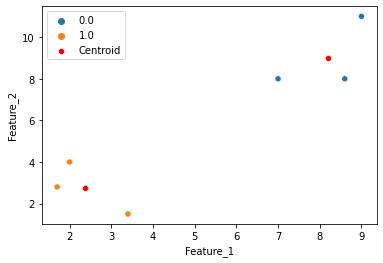

In [7]:
# Print plot for clusters, centroids

sns.scatterplot(data=labeled_df, x="Feature_1", y="Feature_2", hue="Cluster")
sns.scatterplot(data=centroid_df, x="Feature_1", y="Feature_2", color = "r", label = "Centroid")
plt.show()